In [1]:
from Point import Point
from Trips import Trips
from Trip import Trip
from Simulation import Simulation
from Solver import Solver
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [22]:
for n_simulation in range(2,3):
    result_simulation=[]
    for i in range(10):
        print(f'n_simulation={n_simulation} i={i}')
        n,m,ks,kr,kn,T_start,c=Simulation.get_simulation_number(n_simulation)
        J,D=Simulation.initialize_map(n)

        start_time = time.time()
        # trips_problem=Solver.trptr_problem(n,m,J,D,Point(0,0),Point(0,0))
        trips_problem=[]
        execution_time_problem=time.time()-start_time

        start_time = time.time()
        trips=Solver.sa_approach(n, m, ks, kr, kn, T_start, c, J, D, Point(0,0), Point(0,0))
        execution_sa=time.time()-start_time

        start_time = time.time()
        trips_sam=Solver.sam_matheuristic(n, m, J, D, trips,time_limit=60)
        execution_sam=time.time()-start_time

        start_time = time.time()
        trips_sam_ls=Solver.local_search(n,m,J, D, 100000,trips_sam)
        execution_sam_ls=time.time()-start_time

        start_time = time.time()
        trips_sm=Solver.sm_matheuristic(J,D,trips)
        execution_sm=time.time()-start_time

        start_time = time.time()
        trips_sm_ls=Solver.local_search(n,m,J, D, 100000,trips_sm)
        execution_sm_ls=time.time()-start_time


        travel_time_problem=Trips.get_total_duration(trips_problem)
        travel_time_sam=Trips.get_total_duration(trips_sam_ls)
        travel_time_sm=Trips.get_total_duration(trips_sm_ls)

        total_time_sma=execution_sa+execution_sam+execution_sam_ls
        total_time_sm=execution_sa+execution_sm+execution_sm_ls

        result_simulation.append( (J,D,
                                   trips_problem,execution_time_problem,
                                   trips,execution_sa,
                                   trips_sam,execution_sam,
                                   trips_sam_ls,execution_sam_ls,
                                   trips_sm,execution_sm,
                                   trips_sm_ls,execution_sm_ls
                                   ))
    with open(f'result_simulation_{n_simulation}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump(result_simulation, f)


n_simulation=2 i=0
Set parameter TimeLimit to value 60
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 609 rows, 558 columns and 2072 nonzeros
Model fingerprint: 0x96ea9215
Variable types: 9 continuous, 549 integer (549 binary)
Coefficient statistics:
  Matrix range     [8e-01, 1e+02]
  Objective range  [1e+00, 8e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 918.8463658
Presolve removed 97 rows and 0 columns
Presolve time: 0.00s
Presolved: 512 rows, 558 columns, 1975 nonzeros
Variable types: 9 continuous, 549 integer (549 binary)

Root relaxation: objective 3.778412e+02, 657 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  377.84122    0  358  918.84637  377.

# Result first simulation

In [ ]:
with open('result_simulation_0.pkl','rb') as f:  # Python 3: open(..., 'rb')
    result_simulation=pickle.load(f)

In [23]:
execution_times_problem=list(map(lambda x: x[3], result_simulation))
execution_times_sa=list(map(lambda x: x[5], result_simulation))
execution_times_sam=list(map(lambda x: x[7], result_simulation))
execution_times_sam_ls=list(map(lambda x: x[9], result_simulation))
execution_times_sm=list(map(lambda x: x[11], result_simulation))
execution_sm_ls=list(map(lambda x: x[13], result_simulation))

total_execution_times_sam= [x+y+z for x, y,z in zip(execution_times_sa,execution_times_sam,execution_times_sam_ls)]
total_execution_times_sm=[x+y+z for x, y,z in zip(execution_times_sa,execution_times_sm,execution_sm_ls)]

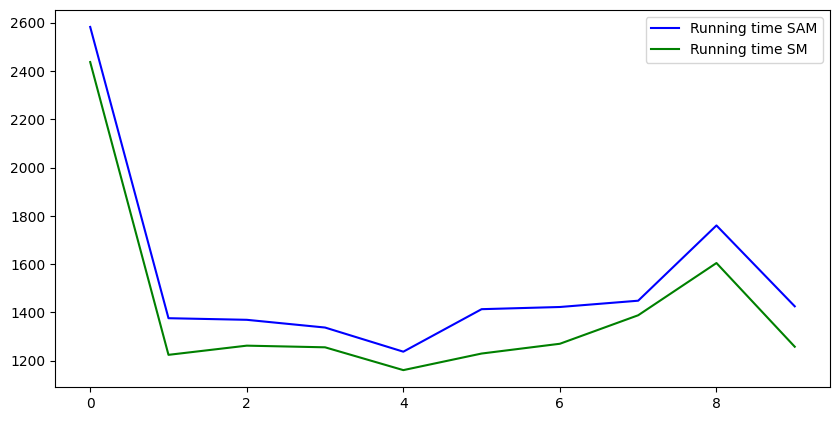

In [24]:
x = range(len(execution_times_problem))
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
#ax.plot(x, execution_times_problem, 'r', x, total_execution_times_sam, 'b', x, total_execution_times_sm, 'g')
ax.plot( x, total_execution_times_sam, 'b', x, total_execution_times_sm, 'g')
#ax.legend(['Running time TRPTR-MIP', 'Running time SAM',"Running time SM"])
ax.legend(['Running time SAM',"Running time SM"])
plt.show()

In [25]:
result_trips_problem=list(map(lambda x: x[2], result_simulation))
result_trips_times_sam_ls=list(map(lambda x: x[8], result_simulation))
result_trips_sm_ls=list(map(lambda x: x[12], result_simulation))

result_trips_duration_problem=[ Trips.get_total_duration(trips) for trips in result_trips_problem]
result_trips_duration_sam_ls=[ Trips.get_total_duration(trips) for trips in result_trips_times_sam_ls]
result_trips_duration_sm_ls=[ Trips.get_total_duration(trips) for trips in result_trips_sm_ls]

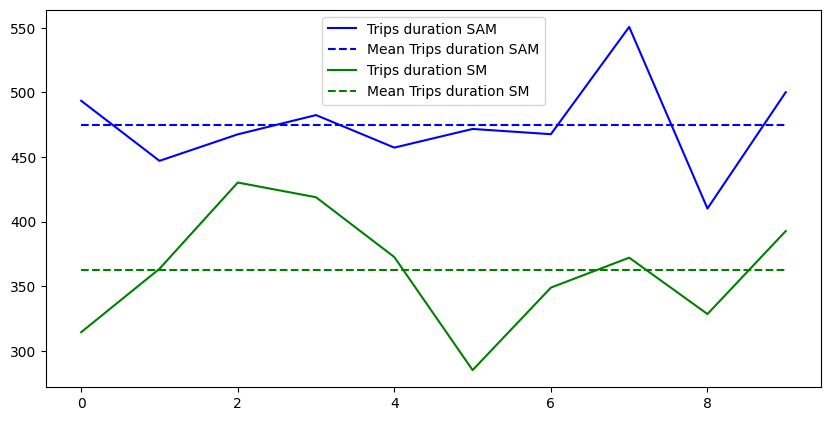

In [26]:
x = range(len(execution_times_problem))
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

mean_sam_ls=np.mean(result_trips_duration_sam_ls)
mean_sm_ls=np.mean(result_trips_duration_sm_ls)

mean_sam_ls_array=[mean_sam_ls for i in range(len(result_trips_duration_sam_ls))]
mean_sm_ls_array=[mean_sm_ls for i in range(len(result_trips_duration_sam_ls))]
#ax.plot(x, result_trips_duration_problem, 'r', x, result_trips_duration_sam_ls, 'b', x, result_trips_duration_sm_ls, 'g')
ax.plot( x, result_trips_duration_sam_ls, 'b',x,mean_sam_ls_array,'b--', x, result_trips_duration_sm_ls, 'g',x,mean_sm_ls_array,'g--')
#ax.legend(['Trips duration TRPTR-MIP', 'Trips duration SAM',"Trips duration  SM"])
ax.legend([ 'Trips duration SAM',"Mean Trips duration SAM","Trips duration SM","Mean Trips duration SM"])
plt.show()

In [29]:
trips_sam_ls_ls=[]
running_time_sam_ls_ls=[]
trips_sm_ls_ls=[]
running_time_sm_ls_ls=[]
for result in result_simulation:
    (J,D,
       trips_problem,execution_time_problem,
       trips,execution_sa,
       trips_sam,execution_sam,
       trips_sam_ls,execution_sam_ls,
       trips_sm,execution_sm,
       trips_sm_ls,execution_sm_ls
       )=result
    start_time = time.time()
    trips_sam_ls_ls.append(Solver.local_search(n,m,J,D,kn,trips_sam_ls))
    running_time_sam_ls_ls.append(time.time()-start_time)
    start_time = time.time()
    trips_sm_ls_ls.append(Solver.local_search(n,m,J,D,kn,trips_sm_ls))
    running_time_sm_ls_ls.append(time.time()-start_time)

In [30]:
result_trips_duration_sam_ls_ls=[ Trips.get_total_duration(trips) for trips in trips_sam_ls_ls]
result_trips_duration_sm_ls_ls=[ Trips.get_total_duration(trips) for trips in trips_sm_ls_ls]

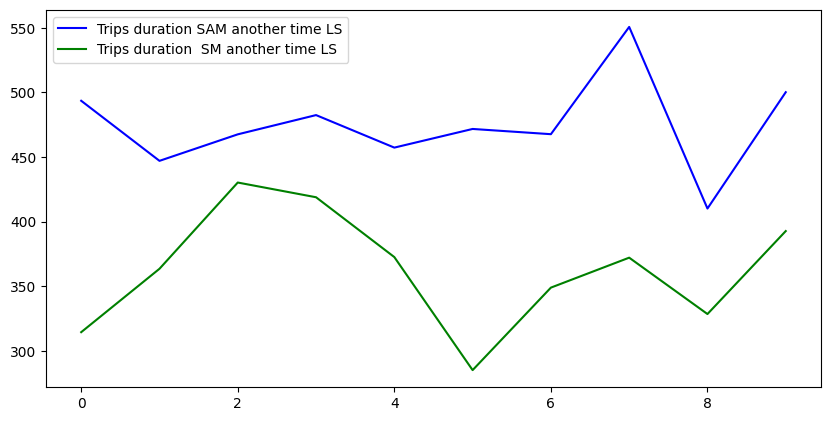

In [31]:
x = range(len(execution_times_problem))
fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
#ax.plot(x, result_trips_duration_problem, 'r', x, result_trips_duration_sam_ls_ls, 'b', x, result_trips_duration_sm_ls_ls, 'g')
ax.plot( x, result_trips_duration_sam_ls_ls, 'b', x, result_trips_duration_sm_ls_ls, 'g')
#ax.legend(['Trips duration TRPTR-MIP', 'Trips duration SAM another time LS',"Trips duration  SM another time LS"])
ax.legend(['Trips duration SAM another time LS',"Trips duration  SM another time LS"])
plt.show()

# Pie Charts

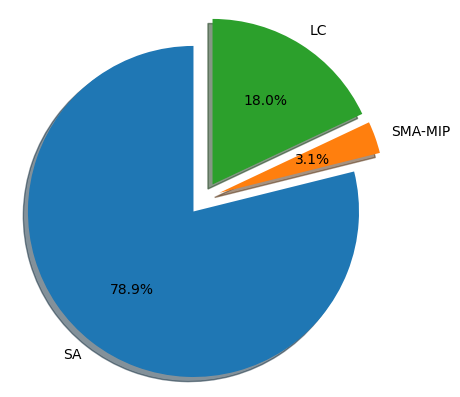

In [27]:
execution_sa_mean=np.mean(execution_times_sa)
total_time_sam_mean=np.mean(total_execution_times_sam)
execution_sam_mean=np.mean(execution_times_sam)
execution_sam_ls_mean=np.mean(execution_times_sam_ls)

labels = 'SA', 'SMA-MIP', 'LC'
sizes = [execution_sa_mean/total_time_sam_mean*100, execution_sam_mean/total_time_sam_mean*100, execution_sam_ls_mean/total_time_sam_mean*100]
explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots(figsize=(5, 5), dpi=100)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

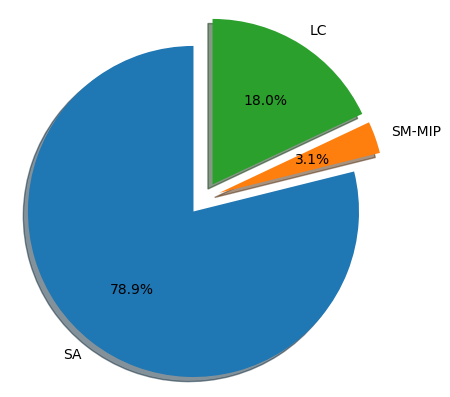

In [28]:
execution_sa_mean=np.mean(execution_times_sa)
total_time_sm_mean=np.mean(total_execution_times_sam)
execution_sm_mean=np.mean(execution_times_sam)
execution_sm_ls_mean=np.mean(execution_times_sam_ls)

labels = 'SA', 'SM-MIP', 'LC'
sizes = [execution_sa_mean/total_time_sm_mean*100, execution_sm_mean/total_time_sm_mean*100, execution_sm_ls_mean/total_time_sm_mean*100]
explode = (0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots(figsize=(5, 5), dpi=100)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## Number of dropoff

## rho and number of relocators


In [ ]:
# large instance
n,m,ks,kr,kn,T_start,c=Simulation.get_simulation_number(2)

m_range=range(4,9)#19
rho_c_range=[x / 10.0 for x in range(40, 61,1)]

results=np.zeros((len(m_range),len(rho_c_range)))
times=np.zeros((len(m_range),len(rho_c_range)))

J,D=Simulation.initialize_map(n)

for i,m in enumerate(m_range):
    for j,rho_c in enumerate(rho_c_range):
        print(f"m={m} rho_c={rho_c}")
        Trip.rho_c=rho_c
        print("start SA")
        start_time = time.time()
        trips=Solver.sa_approach(n, m, ks, kr, kn, T_start, c, J, D, Point(0,0), Point(0,0))
        execution_sa=time.time()-start_time
        print(f"finish SA execution_sa={execution_sa}")

        print("start SM")
        start_time = time.time()
        trips_sm=Solver.sm_matheuristic(J,D,trips)
        execution_sm=time.time()-start_time
        print(f"finish SM execution_sm={execution_sm}")

        print("start LS")
        start_time = time.time()
        trips_sm_ls=Solver.local_search(n,m,J, D, 100000,trips_sm)
        execution_sm_ls=time.time()-start_time
        print(f"finish LS execution_sm_ls={execution_sm_ls}")

        results[i,j]=Trips.get_total_duration(trips_sm_ls)
        times[i,j]=(execution_sa,execution_sm,execution_sm_ls)

with open(f'result_simulation_rho_relocators.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump((results,times), f)

with open(f'result_simulation_rho_relocators_information.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump((J,D), f)


m=4 rho_c=4.0
start SA
finish SA execution_sa=916.6733930110931
start SM
Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-29
Set parameter TimeLimit to value 60
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 60 rows, 17 columns and 233 nonzeros
Model fingerprint: 0x555c98cc
Variable types: 0 continuous, 17 integer (17 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 1177.5479530
Presolve removed 60 rows and 17 columns
Presolve time: 0.01s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 1048.96 1177.55 

Optimal solution found (tolerance 1.00e-04)
Best objec